In [134]:
# Import necessary Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [135]:
# Load all the data.
bom_movie_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
imdb_name_basics_df = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
imdb_title_akas_df = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
imdb_title_basics_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_title_crew_df = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
imdb_title_principals_df = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
imdb_title_ratings_df = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
rt_movie_info_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t')
rt_reviews_df = pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter='\t', encoding='latin-1')
tmdb_movies_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
tn_movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [136]:
#renaming it to work on
money_metrics_df = tn_movie_budgets_df

#funtion for cleaning
def clean_a_money_column(df, series_title):
    df[series_title] = df[series_title].str.replace('$','')
    df[series_title] = df[series_title].str.replace(',','')
    df[series_title] = pd.to_numeric(df[series_title])
    return df

#cleaning
money_metrics_df = clean_a_money_column(money_metrics_df,'worldwide_gross')
money_metrics_df = clean_a_money_column(money_metrics_df,'domestic_gross')
money_metrics_df = clean_a_money_column(money_metrics_df,'production_budget')

#adding profit margin and ROI columns
money_metrics_df['Profit Margin']= (money_metrics_df['worldwide_gross']-money_metrics_df['production_budget'])/money_metrics_df['worldwide_gross']
money_metrics_df['ROI'] = (money_metrics_df['worldwide_gross']/money_metrics_df['production_budget'])

#creating year and month columns
money_metrics_df['Year'] = money_metrics_df['release_date']


#Vu's magic lambda, plus to numeric on the year 
money_metrics_df['Year'] = pd.to_numeric(money_metrics_df['release_date'].map(lambda x: int(x[-4:])))
money_metrics_df['Month'] = money_metrics_df['release_date'].map(lambda x: x[:3])
money_metrics_df = money_metrics_df[money_metrics_df.worldwide_gross != 0]

In [137]:
# Merging all the relevant data into one dataframe.
# All merges should be done with 'left merge' so that we don't lose any data.
new_df = imdb_title_principals_df.merge(imdb_title_crew_df, on='tconst', how='left')
new_df = new_df.merge(imdb_title_basics_df, on='tconst', how='left')
new_df.drop(['ordering', 'job', 'characters'], axis=1, inplace=True)
new_df = new_df.merge(imdb_name_basics_df, on='nconst', how='left')
new_df.drop(['original_title', 'birth_year', 'death_year'], axis=1, inplace=True)
master_df = new_df.merge(money_metrics_df, left_on='primary_title', right_on='movie', how='left')
master_df = master_df.merge(imdb_title_ratings_df, on='tconst', how='left')

In [138]:
master_df

,tconst,nconst,category,directors,writers,primary_title,start_year,runtime_minutes,genres,primary_name,...,movie,production_budget,domestic_gross,worldwide_gross,Profit Margin,ROI,Year,Month,averagerating,numvotes
0,tt0111414,nm0246005,actor,nm0398271,nm0398271,A Thin Life,2018,75.0,Comedy,Tommy Dysart,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0111414,nm0398271,director,nm0398271,nm0398271,A Thin Life,2018,75.0,Comedy,Frank Howson,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0111414,nm3739909,producer,nm0398271,nm0398271,A Thin Life,2018,75.0,Comedy,Barry Porter-Robinson,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0323808,nm0059247,editor,nm0362736,nm0362736,The Wicker Tree,2011,96.0,"Drama,Horror",Sean Barton,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.9,2328.0
4,tt0323808,nm3579312,actress,nm0362736,nm0362736,The Wicker Tree,2011,96.0,"Drama,Horror",Brittania Nicol,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.9,2328.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029449,tt9692684,nm0186469,actor,nm10441594,nm6009913,Disnatured,2016,NaN,"Drama,Fantasy,Horror",Kenneth Cranham,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1029450,tt9692684,nm4929530,self,nm10441594,nm6009913,Disnatured,2016,NaN,"Drama,Fantasy,Horror",Pearl Mackie,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1029451,tt9692684,nm10441594,director,nm10441594,nm6009913,Disnatured,2016,NaN,"Drama,Fantasy,Horror",Guy Jones,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1029452,tt9692684,nm6009913,writer,nm10441594,nm6009913,Disnatured,2016,NaN,"Drama,Fantasy,Horror",Sabrina Mahfouz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
# Make a dataframe that only contains movies that had an above average return on investment.
above_average_movies = master_df[master_df['ROI'] >= money_metrics_df['ROI'].mean()]

In [140]:
# Make a series of all the director's names, and how many of their movies were above average.
aam_directors = above_average_movies[(above_average_movies['category'] == 'director')]['primary_name'].value_counts()

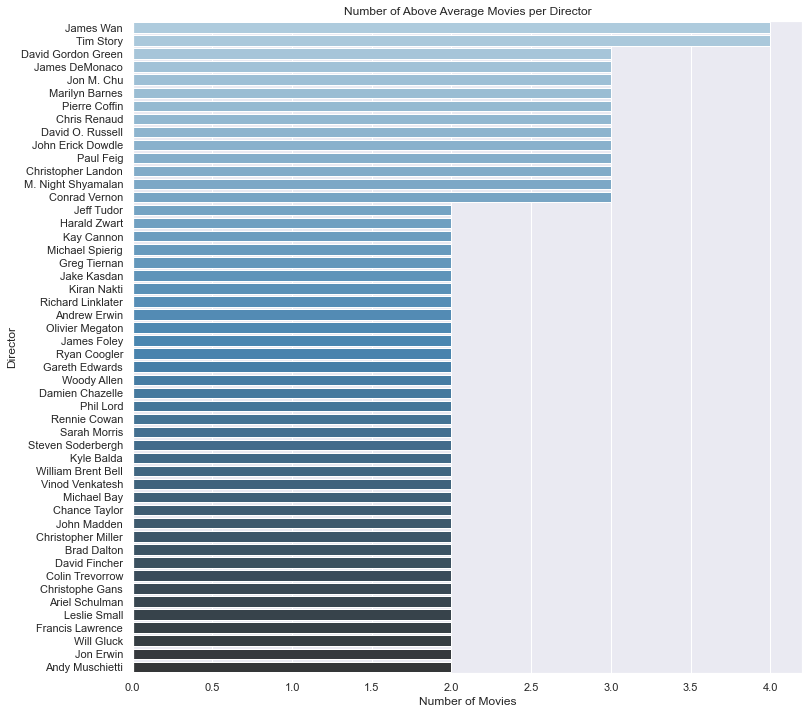

In [141]:
# Plot the 50 most successful names and the number of movies of each director for above average movies.
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(12,12)})
ax = sns.barplot(x=aam_directors.values.tolist()[:50], y=aam_directors.index.tolist()[:50], palette="Blues_d")
ax.set_title('Number of Above Average Movies per Director')
ax.set_xlabel('Number of Movies')
ax.set_ylabel('Director');

In [142]:
# Make the same series for actors and actresses.
aam_actor_actress = above_average_movies[(above_average_movies['category'] == 'actor') | \
                           (above_average_movies['category'] == 'actress')]['primary_name'].value_counts()

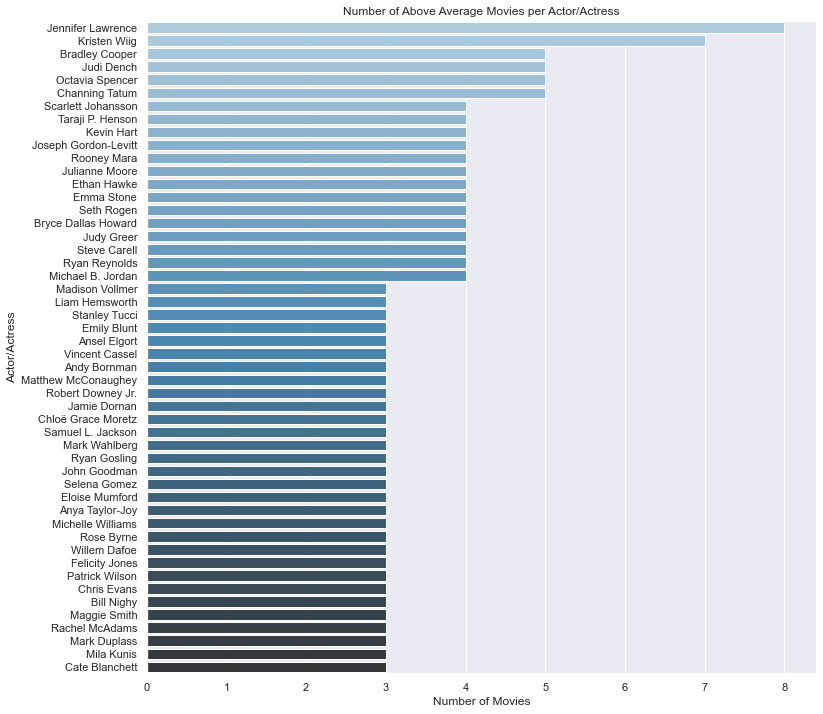

In [158]:
# Make the same plot for actors/actresses.
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(12,12)})
ax = sns.barplot(x=aam_actor_actress.values.tolist()[:50], y=aam_actor_actress.index.tolist()[:50], palette="Blues_d")
ax.set_title('Number of Above Average Movies per Actor/Actress')
ax.set_xlabel('Number of Movies')
ax.set_ylabel('Actor/Actress');

In [159]:
# Set the standard for poor performance movies at having a high budget and a low ROI.
poor_performance_movies = master_df[(master_df['ROI'] <= money_metrics_df['ROI'].median()) & \
          (master_df['production_budget'] >= money_metrics_df['production_budget'].median())]

In [160]:
# Take all the directors from the poor performing movies.
ppm_directors = poor_performance_movies[(poor_performance_movies['category'] == 'director')]['primary_name'].value_counts() 

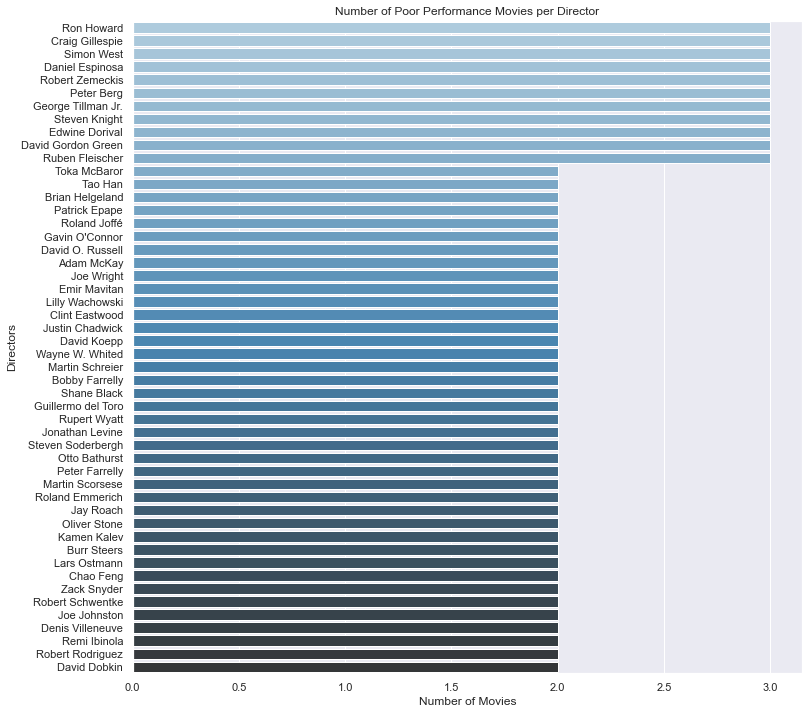

In [161]:
# Plot the 50 least successful names and the number of movies for each director for poor performing movies.
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(12,12)})
ax = sns.barplot(x=ppm_directors.values.tolist()[:50], y=ppm_directors.index.tolist()[:50], palette="Blues_d")
ax.set_title('Number of Poor Performance Movies per Director')
ax.set_xlabel('Number of Movies')
ax.set_ylabel('Directors');

In [162]:
# Use ".intersection" to check how many of the successful movie directors, also directed failed movies.
num_dirs_with_good_bad = len(set(ppm_directors.index.tolist()).intersection( aam_directors.index.tolist()))
# Check what percent of good movie directors have also directed bad movies.
per_good_dirs_with_bad = num_dirs_with_good_bad/len(aam_directors)
per_good_dirs_with_bad

0.1150278293135436

We can see that out of all the directors who have directed movies, only 11% of them have also made bad movies.

In [163]:
# Continue the same process for actors/actresses in poor prformance movies.
ppm_actor_actress = poor_performance_movies[(poor_performance_movies['category'] == 'actor') | \
                           (poor_performance_movies['category'] == 'actress')]['primary_name'].value_counts()


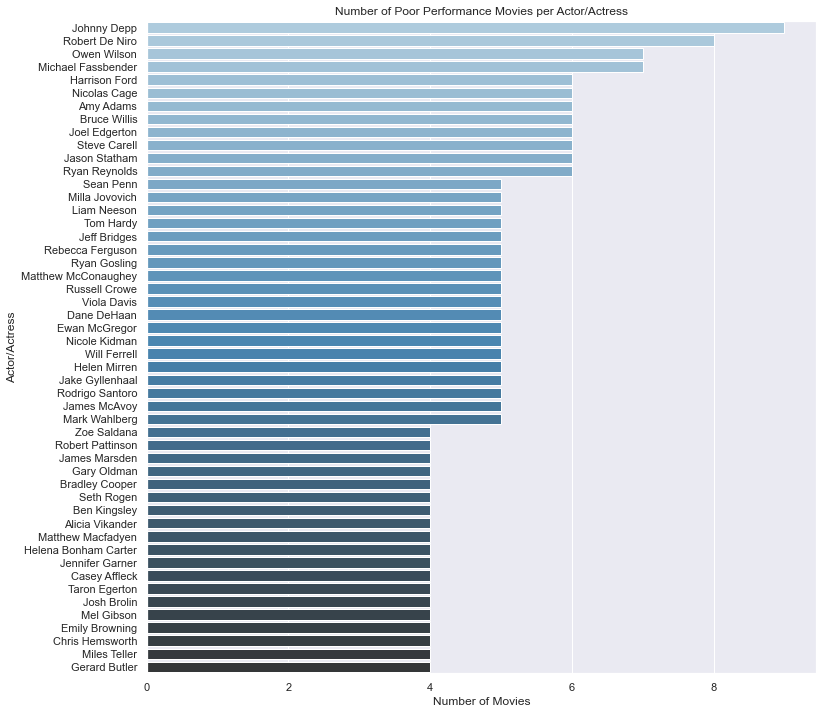

In [164]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(12,12)})
ax = sns.barplot(x=ppm_actor_actress.values.tolist()[:50], y=ppm_actor_actress.index.tolist()[:50], palette="Blues_d")
ax.set_title('Number of Poor Performance Movies per Actor/Actress')
ax.set_xlabel('Number of Movies')
ax.set_ylabel('Actor/Actress');

In [165]:
# Use ".intersection" to check how many of the successful movie actors, also acted in failed movies.
num_acts_with_good_bad = len(set(aam_actor_actress.index.tolist()).intersection(ppm_actor_actress.index.tolist()))
# Check what percent of good movie actors have also acted in  bad movies.
per_good_acts_with_bad = num_acts_with_good_bad/len(aam_actor_actress)
per_good_acts_with_bad

0.20186154741128562

Text(0, 0.5, 'Percentage')

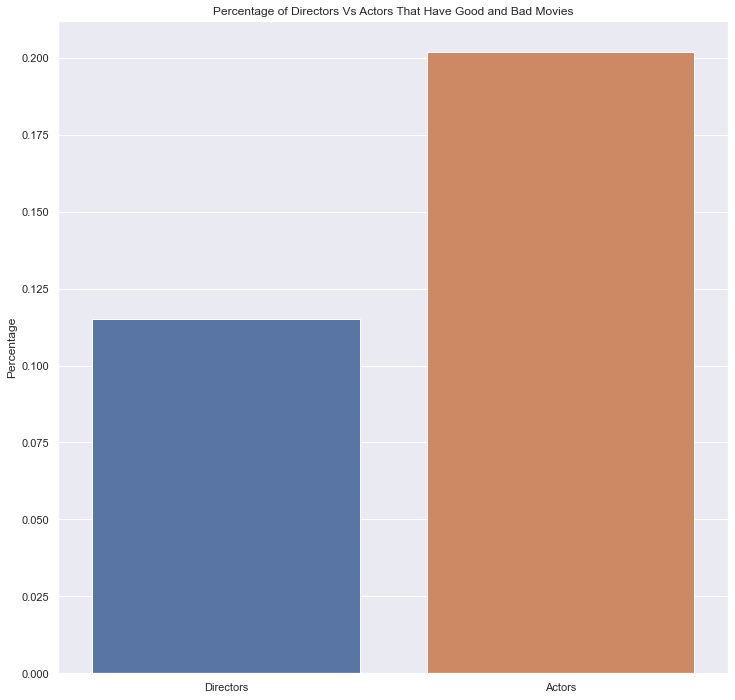

In [166]:
# Plot the difference between the percentages.
sns.set_theme(style="darkgrid")
ax = sns.barplot(x=['Directors', 'Actors'], y=[per_good_dirs_with_bad, per_good_acts_with_bad])
ax.set_title('Percentage of Directors Vs Actors That Have Good and Bad Movies')
ax.set_ylabel('Percentage')

We see that the director of a movie will have a bigger impact on its success than the actors.

Lets see if when we filter our above_average_movies to be only big films, if the results will be any different.
Lets say that we're only going to look at movies that have higher than the median production budgets.

In [152]:
# Add another condition that the production budget needs to be bigger than the median.
bm_above_average_movies = master_df[(master_df['ROI'] >= money_metrics_df['ROI'].mean()) &\
                                   (master_df['production_budget'] >= money_metrics_df['production_budget'].median())]

In [153]:
aa_big_movie_directors = bm_above_average_movies[(bm_above_average_movies['category'] == 'director')]\
                         ['primary_name'].value_counts()

In [154]:
# Use ".intersection" to check how many of the successful movie directors, also directed failed movies.
bm_num_dirs_with_good_bad = len(set(aa_big_movie_directors.index.tolist()).intersection(ppm_directors.index.tolist()))
# Check what percent of good movie directors have also directed bad movies.
bm_per_good_dirs_with_bad = num_dirs_with_good_bad/len(aa_big_movie_directors)
bm_per_good_dirs_with_bad

0.36470588235294116

In [155]:
bm_aam_actor_actress = bm_above_average_movies[(bm_above_average_movies['category'] == 'actor') | \
                    (bm_above_average_movies['category'] == 'actress')]['primary_name'].value_counts()
len(bm_aam_actor_actress)

536

In [156]:
# Use ".intersection" to check how many of the successful movie actors, also acted in failed movies.
bm_num_acts_with_good_bad = len(set(bm_aam_actor_actress.index.tolist()).intersection(ppm_actor_actress.index.tolist()))
# Check what percent of good movie actors have also acted in  bad movies.
bm_per_good_acts_with_bad = num_acts_with_good_bad/len(bm_aam_actor_actress)
bm_per_good_acts_with_bad

0.6473880597014925

In [169]:
1-bm_per_good_acts_with_bad

0.3526119402985075

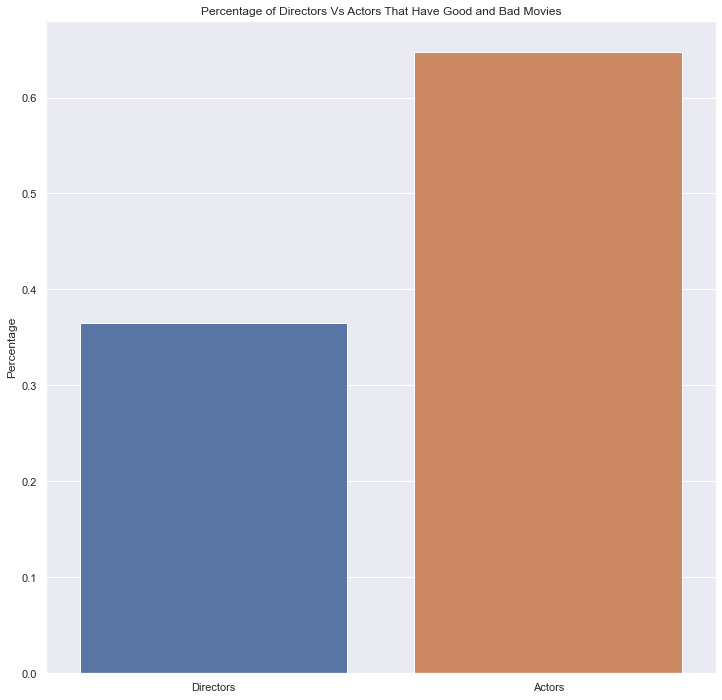

In [167]:
# Plot the difference between the percentages.
sns.set_theme(style="darkgrid")
ax = sns.barplot(x=['Directors', 'Actors'], y=[bm_per_good_dirs_with_bad, bm_per_good_acts_with_bad])
ax.set_title('Percentage of Directors Vs Actors That Have Good and Bad Movies')
ax.set_ylabel('Percentage');

As expected, when we make take less data the differences get bigger.

We can conclude from our exploring, that it probably isn't wise to chase after the most expensive actors or actresses. Since we see that many of them who have done really successful movies, have also done that did not do well.
On the other hand for directors, while there is some overlapping, for the most part the succesful movie directors haven't done many bad ones.
The idea that the director is more important than the actors is pretty intuitive. But the data confirms that while directors obviously aren't the only important factor, it is safe to assume that getting a good director is more important than the actors.